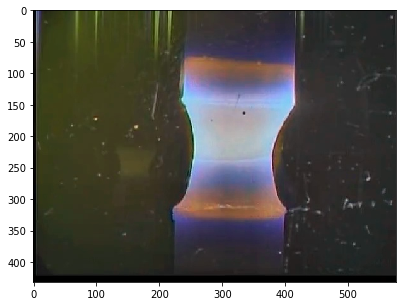

In [87]:
from SciServer import CasJobs
import base64
import matplotlib.pyplot as plt
import cv2  #pip install --user opencv-python
import pandas
my_context="myDB"
import numpy as np

def notebook_display_img(img):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(img)
    plt.show()
    #plt.close(fig)
    
    
img = cv2.imread('frame.jpg', -1)
notebook_display_img(img)

In [88]:
create_table_query = '''
CREATE TABLE ImageTableDemo
(
    Id int NOT NULL IDENTITY(1,1) PRIMARY KEY,
    Name varchar(50),
    Photo varchar(max) 
)
'''
CasJobs.executeQuery(sql=create_table_query, context=my_context)

,Rows Affected
0,0


In [89]:
encoded_string = ''
with open("frame.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())


In [90]:
#test an immediate decoding before going back and forth to CasJobs
decoded_string = base64.b64decode(encoded_string)
with open('decoded_frame.jpg', 'wb') as decoded_file:
    decoded_file.write(decoded_string)

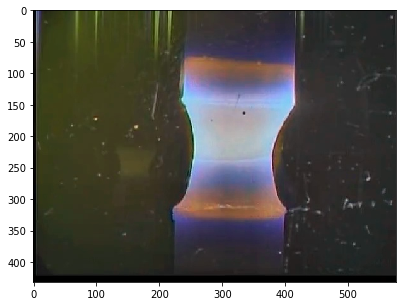

In [94]:
img_decode = cv2.imread('decoded_frame.jpg', -1)
notebook_display_img(img_decode)

In [95]:
#Note that with upload Data Frame, we can bulk upload multiple images at once by populating the dataframe with more images...

name = 'test'
my_columns = ['Id', 'Name', 'Photo']
values = [[0, name, encoded_string]]

df_to_insert = pandas.DataFrame(data=values, index=[0], columns=my_columns)
CasJobs.uploadPandasDataFrameToTable(dataFrame=df_to_insert, tableName='ImageTableDemo', context=my_context)



True

In [96]:
select_img64_query = "select * from ImageTableDemo where Id = 1"
img64_df = CasJobs.executeQuery(sql=select_img64_query, context=my_context)


In [97]:
img64 = img64_df['Photo'][0]
#This next line took a while to figure out. Need to convert the string returned from sciserver into the bytes type
#Needed to do 'encode' to get rid of 'b' at start of string. it was screwing up the decoding process...
img64 = img64[1:].encode()  
decoded_string = base64.b64decode(img64)

with open('casjobs_decoded_frame.jpg', 'wb') as decoded_file:
    decoded_file.write(decoded_string)


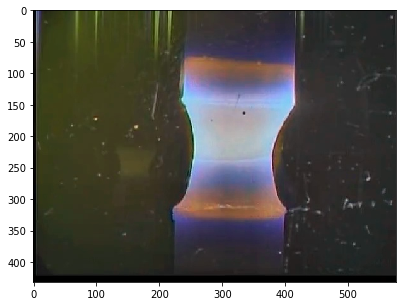

In [99]:
img_decode = cv2.imread('casjobs_decoded_frame.jpg', -1)
notebook_display_img(img_decode)